In [1]:
import h5py
import scipy.sparse

master_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/'
local_matrix_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/ca1_synaptome.npz'
projection_matrix_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/ca3_synaptome.npz'

# Load the sparse matrix
sparse_matrix = scipy.sparse.load_npz(projection_matrix_path)

In [2]:
# Convert the sparse matrix to a dense matrix
# This could require a lot of memory!
dense_matrix = sparse_matrix.todense()

In [5]:
sparse_matrix.max()

8.0

In [3]:
# Save the dense matrix to a HDF5 file
with h5py.File(f'{master_path}/ca3_synaptome.hdf5', 'w') as f:
    f.create_dataset('ca3_synaptome', data=dense_matrix)

MemoryError: Unable to allocate 909. GiB for an array with shape (267238, 456378) and data type float64

In [7]:
from bluepysnap import Circuit

In [8]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/sonata/circuit_config.json')
nodes = c.nodes['hippocampus_neurons']


In [45]:
target_indices = nodes.ids('slice10')

In [47]:
ca3_to_target = sparse_matrix[:,target_indices]

In [40]:
ca3_to_target

<267238x5425 sparse matrix of type '<class 'numpy.float64'>'
	with 95517100 stored elements in Compressed Sparse Column format>

In [48]:
indegree = ca3_to_target.sum(axis=0)
outdegree = ca3_to_target.sum(axis=1)

In [42]:
import numpy as np

In [49]:
np.where(outdegree == 0)

(array([], dtype=int64), array([], dtype=int64))

In [50]:
np.where(indegree == 0)

(array([], dtype=int64), array([], dtype=int64))

In [51]:
import matplotlib.pyplot as plt

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 array([  203. ,  4706.8,  9210.6, 13714.4, 18218.2, 22722. , 27225.8,
        31729.6, 36233.4, 40737.2, 45241. ]),
 <a list of 12615 BarContainer objects>)

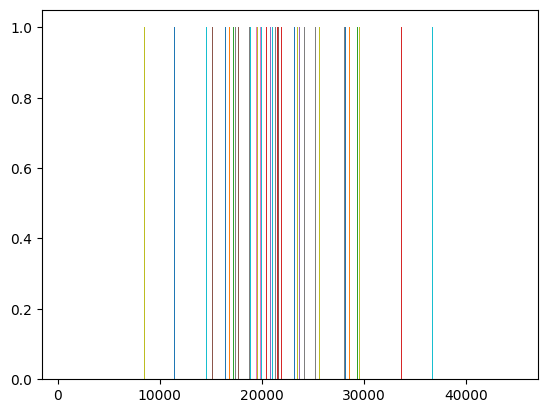

In [53]:
plt.hist(indegree)

(array([1.1700e+02, 2.0210e+03, 1.6609e+04, 5.6602e+04, 9.0507e+04,
        7.1802e+04, 2.4633e+04, 4.5560e+03, 3.7700e+02, 1.4000e+01]),
 array([ 806. ,  833.4,  860.8,  888.2,  915.6,  943. ,  970.4,  997.8,
        1025.2, 1052.6, 1080. ]),
 <BarContainer object of 10 artists>)

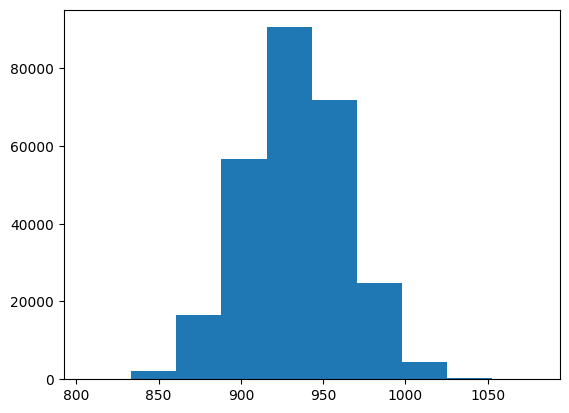

In [54]:
plt.hist(outdegree)